In [1]:
import os

import numpy as np
from matplotlib import pyplot as plt, colors, lines

## Generate plots for GrAPL

This code expects the output from the `polblogs` and `Compare vs APT` notebooks, so be sure to run those first.

In [2]:
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = [3, 2.5]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 8
plt.rcParams['axes.titlesize'] = 'small'
plt.rcParams['axes.titlepad'] = 3
plt.rcParams['xtick.labelsize'] = 'x-small'
plt.rcParams['ytick.labelsize'] = plt.rcParams['xtick.labelsize']
plt.rcParams['legend.fontsize'] = 6
plt.rcParams['legend.handlelength'] = 1.5
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.linewidth'] = 0.7
plt.rcParams['axes.linewidth'] = 0.6
plt.rcParams['grid.linewidth'] = 0.6
plt.rcParams['xtick.major.width'] = 0.6
plt.rcParams['xtick.minor.width'] = 0.4
plt.rcParams['ytick.major.width'] = plt.rcParams['xtick.major.width']
plt.rcParams['ytick.minor.width'] = plt.rcParams['xtick.minor.width']
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
T = 1222
gammas = np.logspace(-9, 1, 6)
epsilon = 0.01
p_err = 0
n_trials = 100

res_npz = np.load('polblogs.npz')
res_AP_np = res_npz['res_AP_np']
res_rand_np = res_npz['res_rand_np']

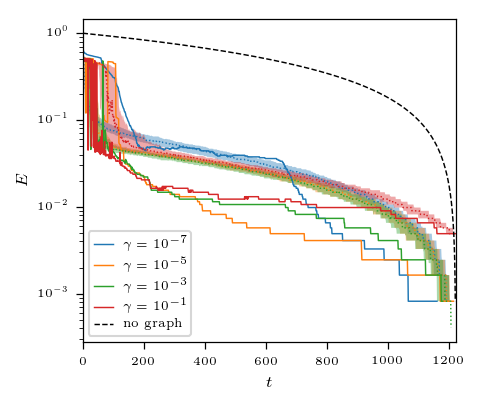

In [4]:
for j, (i, gamma) in enumerate((list(gammas).index(gamma), gamma) for gamma in [1e-7, 1e-5, 1e-3, 1e-1]):
    plt.semilogy(res_AP_np[i, 0, :], c=color_cycle[j], label=r'$\gamma=10^{%g}$' % np.log10(gamma))
    y_1q = np.maximum(1 / T, np.percentile(res_rand_np[:, i, :], 25, 0))
    y_3q = np.maximum(1 / T, np.percentile(res_rand_np[:, i, :], 75, 0))
    plt.fill_between(np.arange(T), y_1q, y_3q, facecolor=color_cycle[j], alpha=0.4)
    plt.semilogy(np.median(res_rand_np[:, i, :], 0), ':', c=color_cycle[j])
plt.plot(np.arange(T, 0, -1) / T, '--k', label='no graph')
plt.ylabel('$E$')
plt.xlabel('$t$')
plt.xlim(0, T)
plt.legend()
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig('polblogs.pdf')
plt.show()

In [5]:
n = 10**3
sigma = 2
T = 5000
gammas = [1, 10, 100]
tau = 0
epsilon = 1e-2
alpha = 1

n_trials = 100

res_npz = np.load('sbm_binary_alpha_1.npz')
res4_np = res_npz['res4_np']
res4_opt_np = res_npz['res4_opt_np']
res4_rand_np = res_npz['res4_rand_np']

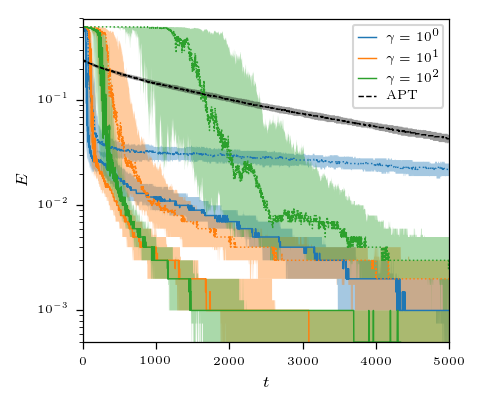

In [6]:
min_nonzero = 0.5 * np.min(res4_np[:, :, 0, :][res4_np[:, :, 0, :] > 0])

for j, i in enumerate([gammas.index(g) for g in [1, 10, 100]]):
    y = np.median(res4_np[:, i, 0, :], 0)
    y_1q = np.maximum(min_nonzero, np.percentile(res4_np[:, i, 0, :], 25, 0))
    y_3q = np.maximum(min_nonzero, np.percentile(res4_np[:, i, 0, :], 75, 0))
    plt.fill_between(np.arange(T), y_1q, y_3q, facecolor=color_cycle[j], alpha=0.4)
    plt.semilogy(y, c=color_cycle[j], label='$\gamma=10^{%g}$' % np.log10(gammas[i]))
    y = np.median(res4_rand_np[:, i, 0, :], 0)
    y_1q = np.maximum(min_nonzero, np.percentile(res4_rand_np[:, i, 0, :], 25, 0))
    y_3q = np.maximum(min_nonzero, np.percentile(res4_rand_np[:, i, 0, :], 75, 0))
    plt.fill_between(np.arange(T), y_1q, y_3q, facecolor=color_cycle[j], alpha=0.4)
    plt.plot(y, ':', c=color_cycle[j])
y = np.median(res4_opt_np[:, 0, :], 0)
y_1q = np.maximum(min_nonzero, np.percentile(res4_opt_np[:, 0, :], 25, 0))
y_3q = np.maximum(min_nonzero, np.percentile(res4_opt_np[:, 0, :], 75, 0))
# plt.fill_between(np.arange(T), y_1q, y_3q, facecolor=color_cycle[3], alpha=0.4)
# plt.plot(y, '--', c=color_cycle[3], label='$\gamma=\gamma^*$')
y = np.median(res4_np[:, 0, 1, :], 0)
y_1q = np.percentile(res4_np[:, 0, 1, :], 25, 0)
y_3q = np.percentile(res4_np[:, 0, 1, :], 75, 0)
plt.fill_between(np.arange(T), y_1q, y_3q, facecolor='black', alpha=0.4)
plt.plot(y, '--', c='black', label='APT')
plt.ylim(min_nonzero, 0.6)
plt.ylabel('$E$')
plt.xlabel('$t$')
plt.xlim(0, T)
plt.legend(loc='upper right')
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig('sbm_alpha_1.pdf')
plt.show()

In [7]:
n = 10**3
m = 4
p = 0.01
lamda_gen = 1000
T = 5000
gammas = [1, 100, 10000]
tau = 0.5
epsilon = 1e-2
alpha = 1e-8

n_trials = 100

res_npz = np.load('newman_small_world_5000.npz')
res2_np = res_npz['res2_np']
res2_opt_np = res_npz['res2_opt_np']
res2_rand_np = res_npz['res2_rand_np']

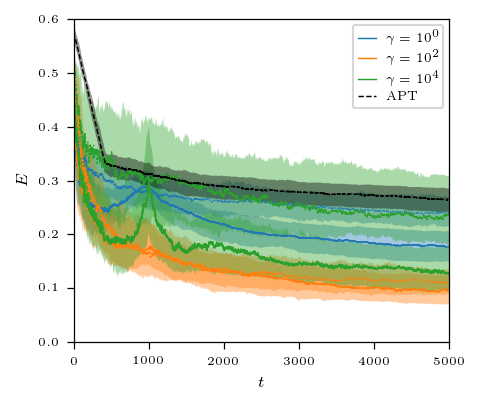

In [8]:
for j, i in enumerate([gammas.index(g) for g in [1, 100, 10000]]):
    y = np.median(res2_np[:, i, 0, :], 0)
    y_1q = np.percentile(res2_np[:, i, 0, :], 25, 0)
    y_3q = np.percentile(res2_np[:, i, 0, :], 75, 0)
    plt.fill_between(np.arange(T), y_1q, y_3q, facecolor=color_cycle[j], alpha=0.4)
    plt.plot(y, c=color_cycle[j], label=r'$\gamma=10^{%g}$' % np.log10(gammas[i]))
    y = np.median(res2_rand_np[:, i, 0, :], 0)
    y_1q = np.percentile(res2_rand_np[:, i, 0, :], 25, 0)
    y_3q = np.percentile(res2_rand_np[:, i, 0, :], 75, 0)
    plt.fill_between(np.arange(T), y_1q, y_3q, facecolor=color_cycle[j], alpha=0.4)
    plt.plot(y, ':', c=color_cycle[j])
y = np.median(res2_opt_np[:, 0, :], 0)
y_1q = np.maximum(min_nonzero, np.percentile(res2_opt_np[:, 0, :], 25, 0))
y_3q = np.maximum(min_nonzero, np.percentile(res2_opt_np[:, 0, :], 75, 0))
# plt.fill_between(np.arange(T), y_1q, y_3q, facecolor=color_cycle[3], alpha=0.4)
# plt.plot(y, c=color_cycle[3], label='$\gamma=\gamma^*$')
y = np.median(res2_np[:, 0, 1, :], 0)
y_1q = np.percentile(res2_np[:, 0, 1, :], 25, 0)
y_3q = np.percentile(res2_np[:, 0, 1, :], 75, 0)
plt.fill_between(np.arange(T), y_1q, y_3q, facecolor='black', alpha=0.4)
plt.plot(y, '--', c='black', label='APT')
plt.legend()
plt.ylabel('$E$')
plt.xlabel('$t$')
plt.ylim(0, 0.6)
plt.xlim(0, T)
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.savefig('newman_watts_strogatz.pdf')
plt.show()